In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_datareader as pdr
import datetime as datetime

In [2]:
data = pd.read_csv("C:/Users/asus/OneDrive/Desktop/Wallmart.csv")
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# Data Cleaning

In [3]:
# Convert date to datetime format 
data['Date'] = pd.to_datetime(data['Date'])
data.info()     # To check our date column should be datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


C:\Users\asus\AppData\Local\Temp\ipykernel_2312\2110961286.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [4]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
## Checking for missing values:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
# Splitting data column into day, month and year:

data["Day"]= pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [7]:
data.set_index("Date",inplace=True)

In [8]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
Date,,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


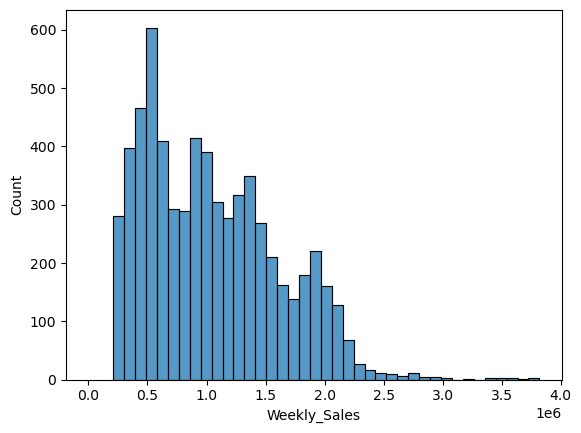

In [9]:
# Visualize the distribution of key features
sns.histplot(data['Weekly_Sales'])
sns.histplot(data['Unemployment'])
plt.show()

In [53]:
# Correlation analysis
correlation_matrix = data[['Weekly_Sales', 'Unemployment']].corr()
print(correlation_matrix)

              Weekly_Sales  Unemployment
Weekly_Sales      1.000000     -0.106176
Unemployment     -0.106176      1.000000


In [21]:
# Store-level Analysis
store_analysis = data.groupby('Store')[['Weekly_Sales', 'Unemployment']].mean().sort_values(by=["Unemployment"])
store_analysis

,Weekly_Sales,Unemployment
Store,,
23,1.389864e+06,4.796014
40,9.641280e+05,4.796014
4,2.094713e+06,5.964692
8,9.087495e+05,6.091846
9,5.439806e+05,6.099881
5,3.180118e+05,6.295406
16,5.192477e+05,6.477993
17,8.935814e+05,6.549406
6,1.564728e+06,6.606902


<Axes: title={'center': 'unemployment_rate for each store'}, xlabel='Store', ylabel='unemployment_rate'>

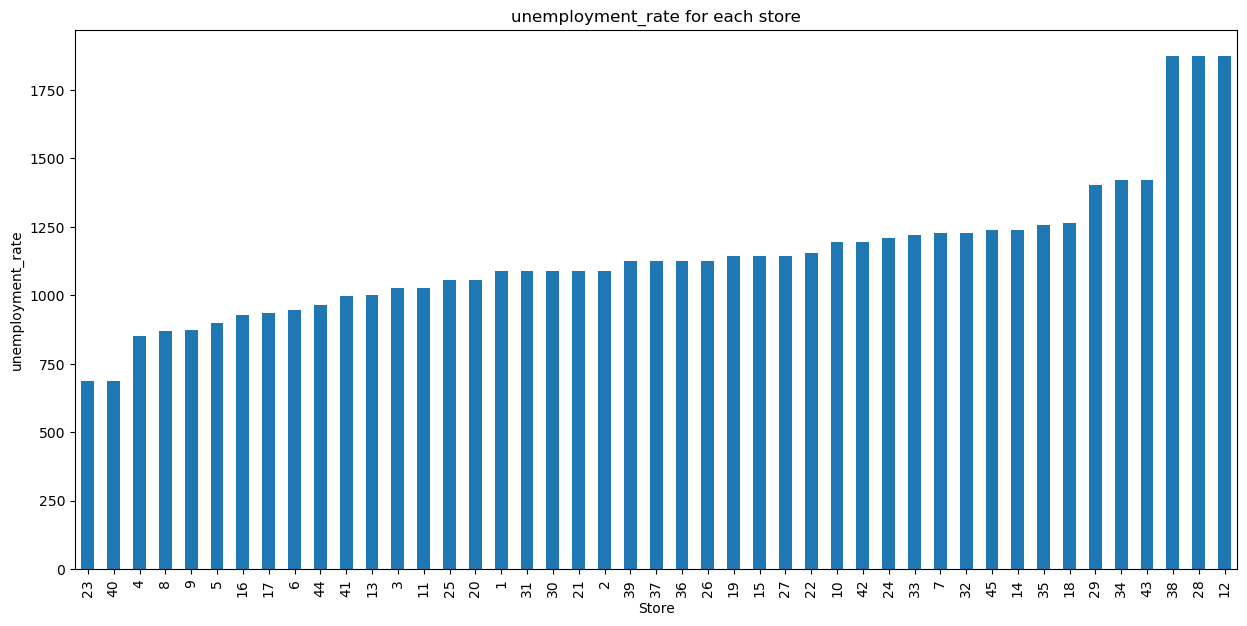

In [22]:
unemployment_rate= data.groupby('Store')['Unemployment'].sum().sort_values() 
unemployment_rate_array = np.array(unemployment_rate)
plt.figure(figsize=(15,7))
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('unemployment_rate for each store')
plt.xlabel('Store')
plt.ylabel('unemployment_rate')
unemployment_rate.plot(kind= "bar")

# Clearly, from the above graph, it is visible that the stores which have maximum unemployment rate are store numbers - 38, 28, 12

In [25]:
# Create a time series with weekly sales
weekly_sales_time_series = data.groupby('Date')['Weekly_Sales'].sum()
weekly_sales_time_series

Date
2010-01-10    42239875.87
2010-02-04    50423831.26
2010-02-07    48917484.50
2010-02-19    48276993.78
2010-02-26    43968571.13
                 ...     
2012-10-08    47403451.04
2012-10-19    45122410.57
2012-10-26    45544116.29
2012-11-05    46925878.99
2012-12-10    46128514.25
Name: Weekly_Sales, Length: 143, dtype: float64

In [29]:
# Time Series Decomposition
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

res = sm.tsa.seasonal_decompose(weekly_sales_time_series, period = 4)

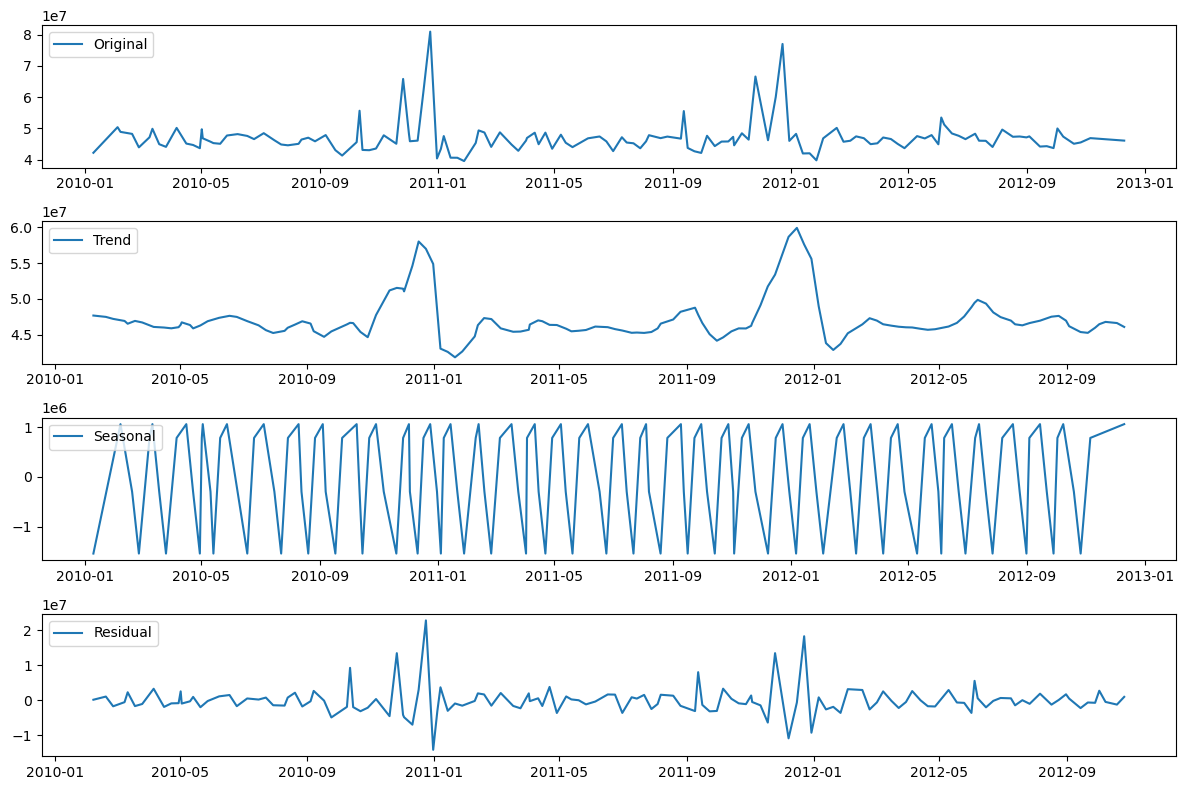

In [30]:
# Plotting the decomposed time series
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(weekly_sales_time_series, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(res.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(res.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(res.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Clearly, from the above graph, it shows seasonal trend exactly after every 1 year .

In [31]:
# Correlation Analysis
correlation_temperature_sales = data['Temperature'].corr(data['Weekly_Sales'])

print(f"Correlation between Temperature and Weekly Sales: {correlation_temperature_sales}")

Correlation between Temperature and Weekly Sales: -0.06381001317946962


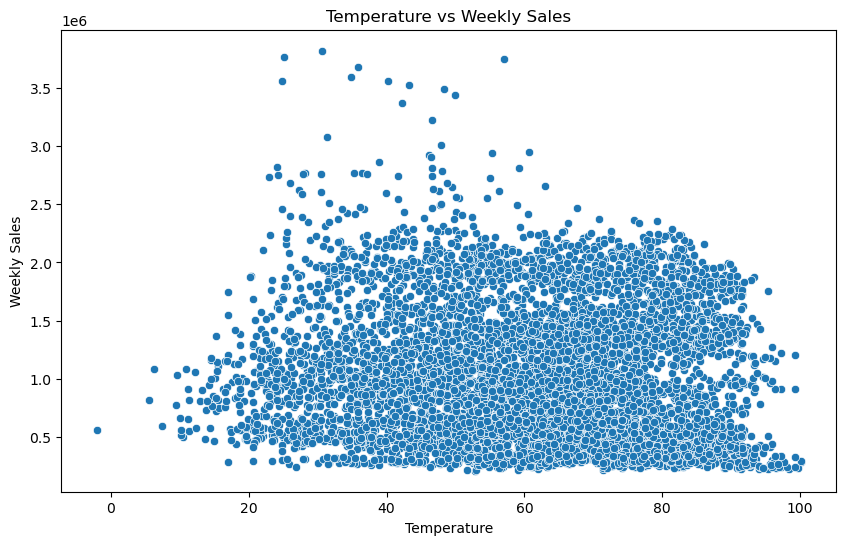

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

# The correlation coefficient is close to 0, it indicates a weak or no linear correlation.

In [34]:
# Correlation Analysis
correlation_cpi_sales = data['CPI'].corr(data['Weekly_Sales'])

print(f"Correlation between CPI and Weekly Sales: {correlation_cpi_sales}")

Correlation between CPI and Weekly Sales: -0.07263416204017631


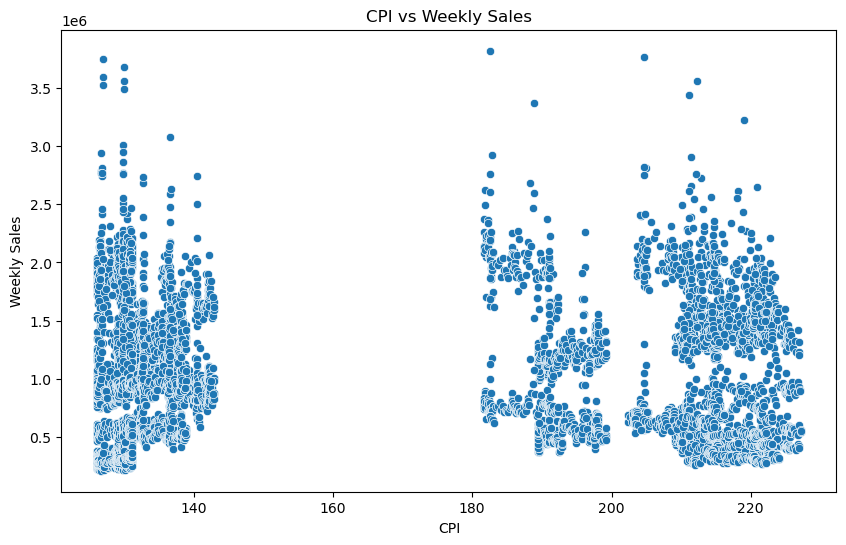

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data)
plt.title('CPI vs Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

# The correlation coefficient is close to 0, it indicates that CPI and Weekly Sales show a weak or no linear correlation.

<Axes: title={'center': 'Total sales for each store'}, xlabel='Store', ylabel='Total Sales'>

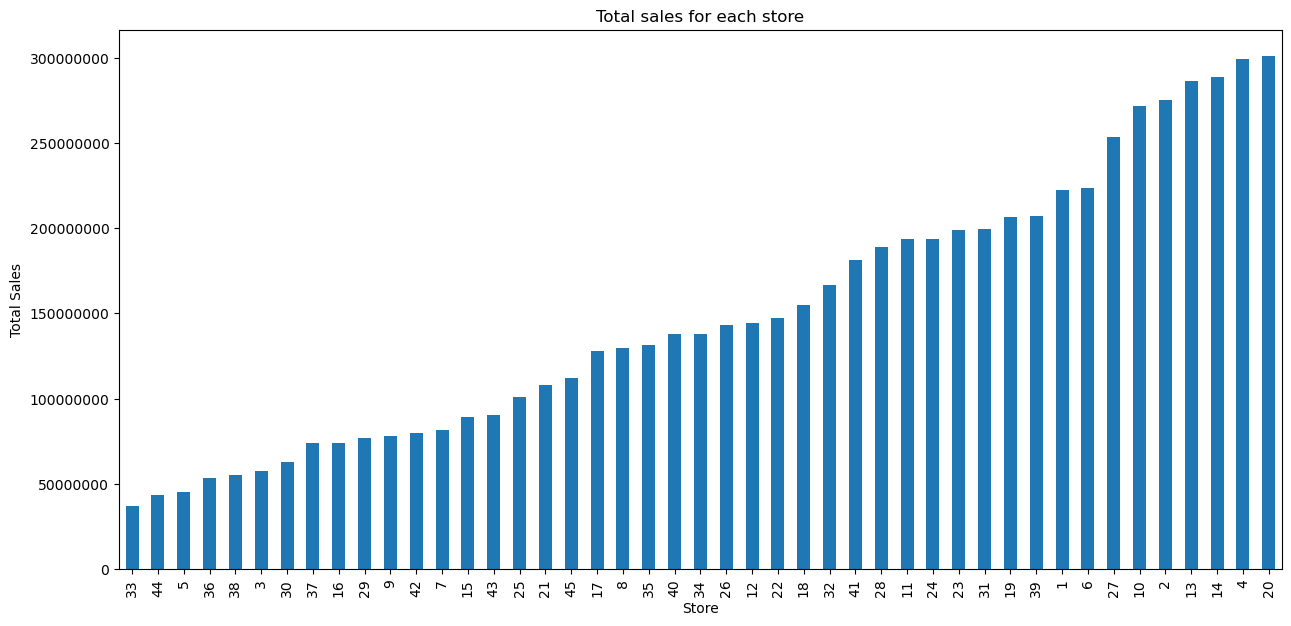

In [39]:
total_sales= data.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_array = np.array(total_sales)
plt.figure(figsize=(15,7))
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
total_sales.plot(kind='bar')

# Clearly, from the above graph, it is visible that the stores which have maximum sales are store number 4 and 20.

# And the worst performing store is store number 33.

In [40]:
Max_sale_store = total_sales_array.max()
Max_sale_store

301397792.46

In [41]:
Min_sale_store = total_sales_array.min()
Min_sale_store

37160221.96

In [42]:
Difference = Max_sale_store - Min_sale_store
Difference

264237570.49999997

In [46]:
percentage_difference = (Difference/Max_sale_store)*100
percentage_difference

print(f"Difference between hightest performing store and lowest performing store: {Difference}")
print(f"Percentage_difference between hightest performing store and lowest performing store: {percentage_difference}")

Difference between hightest performing store and lowest performing store: 264237570.49999997
Percentage_difference between hightest performing store and lowest performing store: 87.67070533042084


# Stationarity Test

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print("p-value: {}".format(result[1]))
    if result[1] <= 0.05:
        print("Strong evidence to reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence to reject the null hypothesis. Time series has a unit root indicating  it is non-stationary")

In [14]:
adf_test(data["Weekly_Sales"])

ADF Statistics: -4.624149498578305
p-value: 0.00011655869699901207
Strong evidence to reject the null hypothesis. Data has no unit root and is stationary


# Ploting ACF and PACF 

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

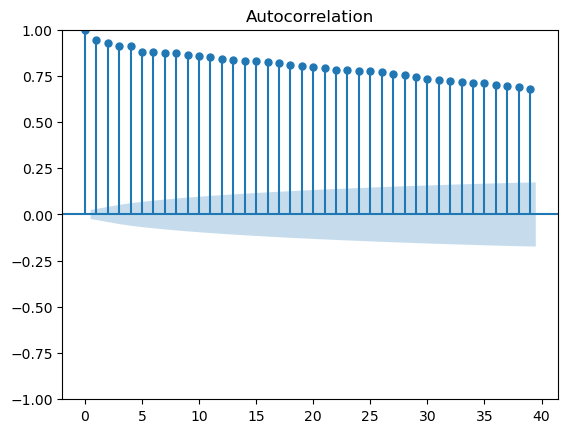

In [16]:
acf = plot_acf(data["Weekly_Sales"].dropna())     ## We find q = 39

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


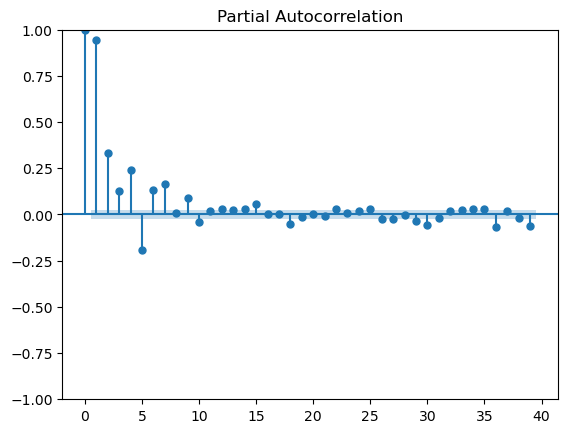

In [17]:
pacf = plot_pacf(data["Weekly_Sales"].dropna())   # We find p = 7

In [52]:
# Create a time series with weekly sales
weekly_sales_time_series = data.groupby('Date')['Weekly_Sales'].sum()
weekly_sales_time_series

Date
2010-01-10    42239875.87
2010-02-04    50423831.26
2010-02-07    48917484.50
2010-02-19    48276993.78
2010-02-26    43968571.13
                 ...     
2012-10-08    47403451.04
2012-10-19    45122410.57
2012-10-26    45544116.29
2012-11-05    46925878.99
2012-12-10    46128514.25
Name: Weekly_Sales, Length: 143, dtype: float64

In [51]:
# Splitting the data into Train and test
train_size = int(len(weekly_sales_time_series) * 0.8)

train= weekly_sales_time_series[:train_size] 
test = weekly_sales_time_series[train_size:]
print(f"Train Size: {train_size}")

Train Size: 114


In [79]:
## Defining the ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(5,1,0))

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [80]:
# Fitting the model
model_fit = model.fit()

In [81]:
# Forecast the next 12 weeks
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ValueError: x and y must have same first dimension, but have shapes (29,) and (12,)

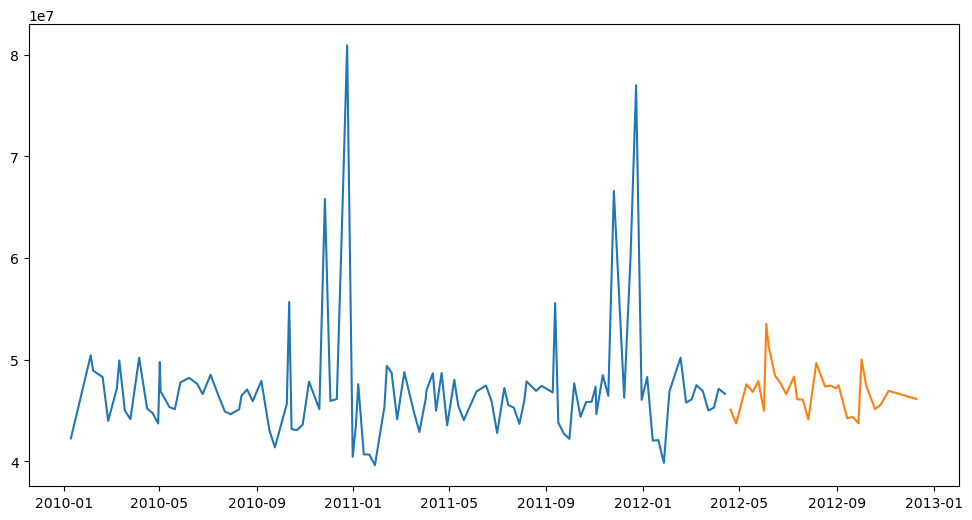

In [82]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(weekly_sales_time_series.index[train_size:], forecast, label='Forecast')
plt.title('ARIMA Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [83]:
# Evaluate the model performance on the test set
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test, forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')

ValueError: Found input variables with inconsistent numbers of samples: [29, 12]